In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
df = pd.read_csv('heart.csv')

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64
               age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
mean     54.434146     0.695610     0.942439   131.611707   246.00000   
std       9.072290     0.460373     1.029641    17.516718    51.59251   
min      29.000000     0.000000     0.000000    94.000000   126.00000   
25%      48.000000     0.000000     0.000000   120.000000   211.00000   
50%      56.000000     1.000000     1.000000   130.000000  

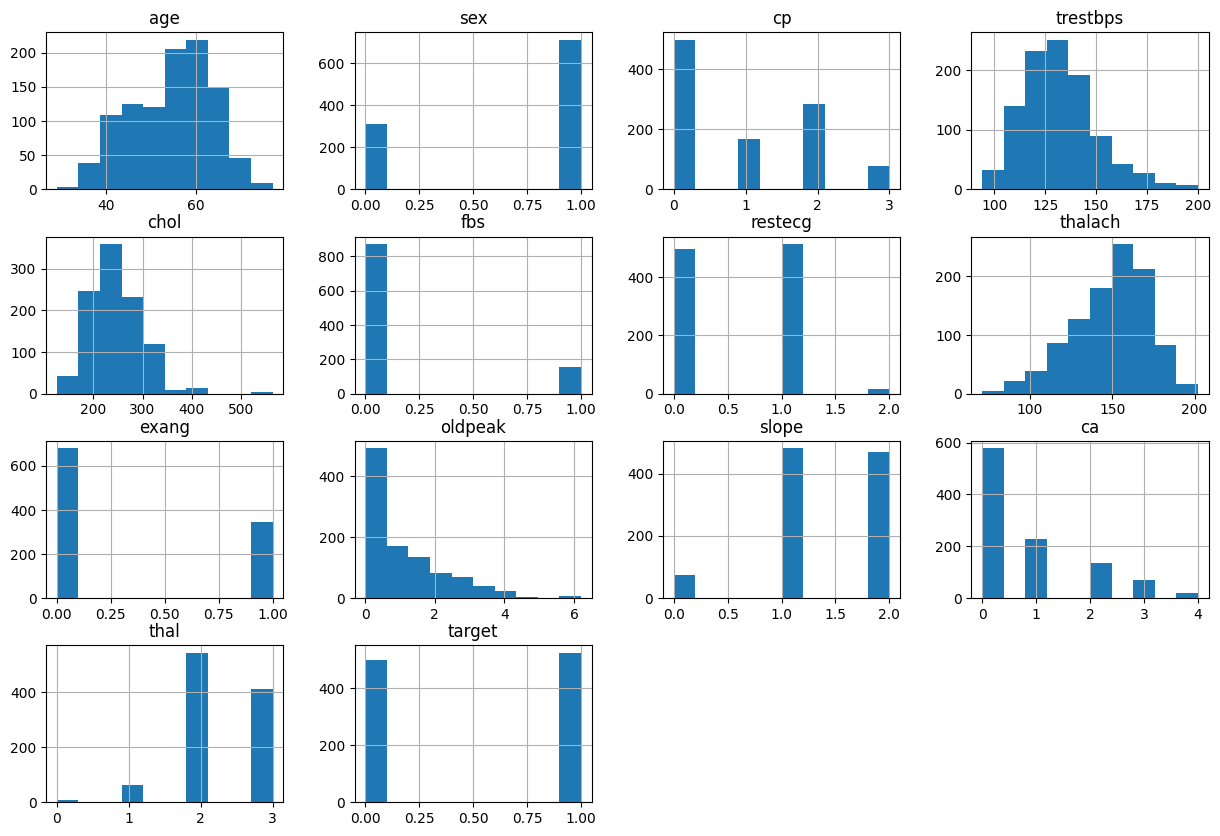

In [2]:
print(df.dtypes)
print(df.isnull().sum())
print(df.describe())
df.hist(figsize=(15, 10))
plt.show()

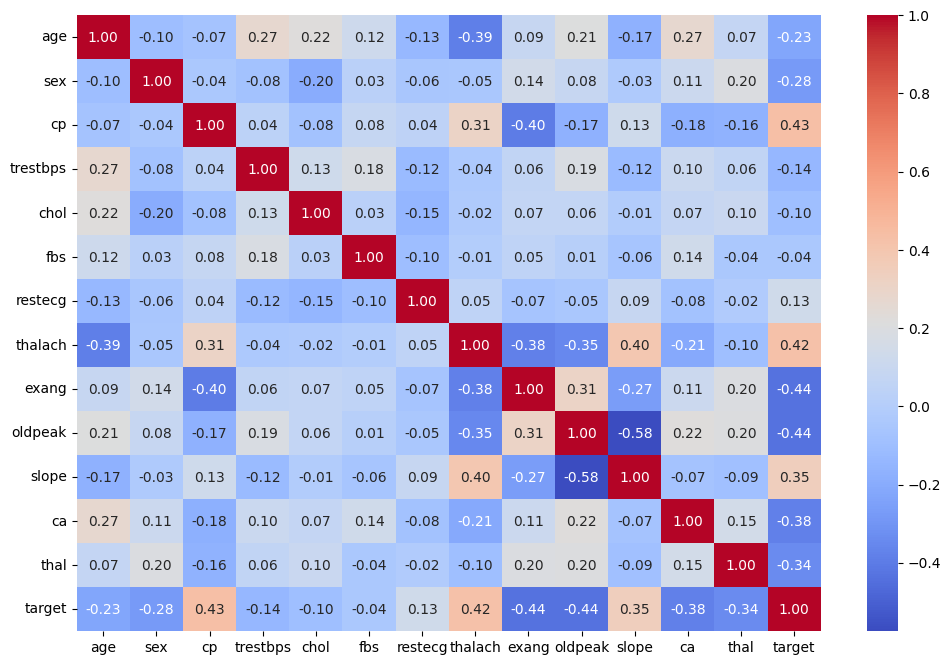

Shape of DataFrame: (1025, 14)


In [3]:
corr_matrix = df.corr()
plt.figure(figsize=(12, 8))
import seaborn as sns
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"Unique values and frequencies for {col}:")
    print(df[col].value_counts())

print(f"Shape of DataFrame: {df.shape}")

In [4]:
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
nominal_cols = ['cp', 'restecg', 'slope', 'thal']
ordinal_cols = ['sex', 'fbs', 'exang', 'ca']

df = pd.get_dummies(df, columns=nominal_cols, drop_first=True)

df['sex'] = df['sex'].map({0: 0, 1: 1})
df['fbs'] = df['fbs'].map({0: 0, 1: 1})
df['exang'] = df['exang'].map({0: 0, 1: 1})

print(df.dtypes)

age            int64
sex            int64
trestbps       int64
chol           int64
fbs            int64
thalach        int64
exang          int64
oldpeak      float64
ca             int64
target         int64
cp_1            bool
cp_2            bool
cp_3            bool
restecg_1       bool
restecg_2       bool
slope_1         bool
slope_2         bool
thal_1          bool
thal_2          bool
thal_3          bool
dtype: object


In [5]:
for col in df.columns:
    if df[col].dtype == 'bool':
        df[col] = df[col].astype(int)

print(df.dtypes)

age            int64
sex            int64
trestbps       int64
chol           int64
fbs            int64
thalach        int64
exang          int64
oldpeak      float64
ca             int64
target         int64
cp_1           int64
cp_2           int64
cp_3           int64
restecg_1      int64
restecg_2      int64
slope_1        int64
slope_2        int64
thal_1         int64
thal_2         int64
thal_3         int64
dtype: object


In [7]:
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)



X_train shape: (820, 19)
X_test shape: (205, 19)
y_train shape: (820,)
y_test shape: (205,)


In [8]:
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)


DecisionTreeClassifier()

DecisionTreeClassifier()

In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.

On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org

In [9]:
y_pred = dt_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"AUC: {auc:.4f}")


Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-score: 1.0000
AUC: 1.0000


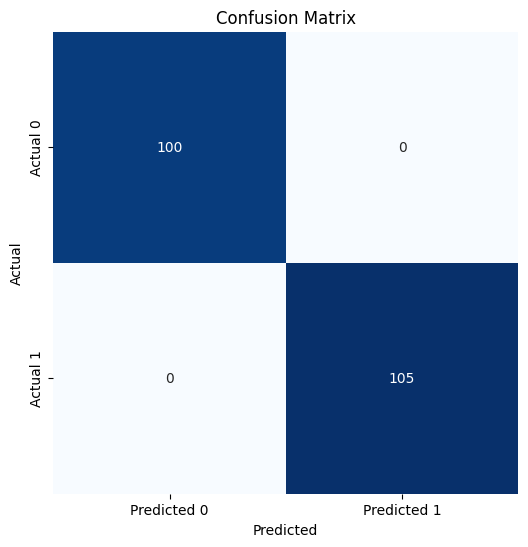

In [10]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [11]:

rf_classifier = RandomForestClassifier(
    max_depth=20,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42
)
rf_classifier.fit(X_train, y_train)


RandomForestClassifier(max_depth=20, random_state=42)

In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.

On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.


In [12]:
from sklearn.tree import export_graphviz
import graphviz


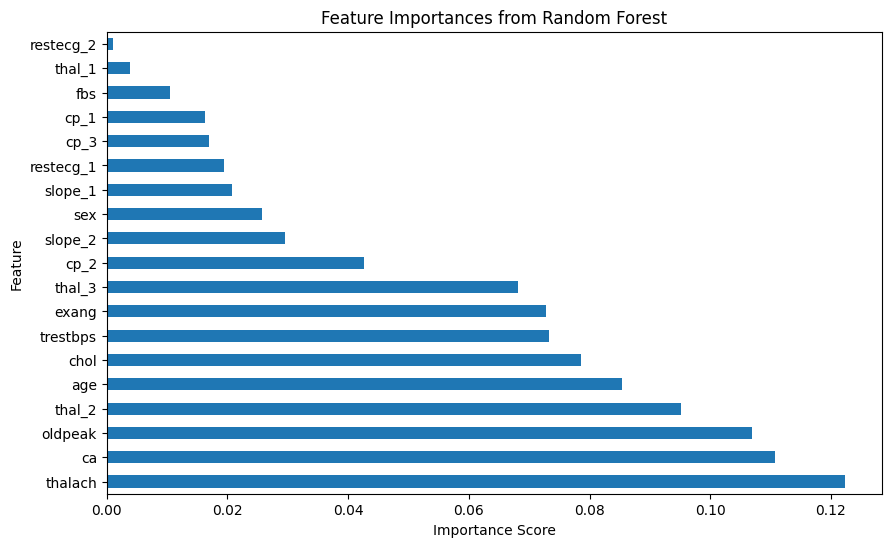

Analysis:
Based on the horizontal bar plot, the top three most important features in predicting heart disease using the Random Forest model are:
- thalach: 0.1223
- ca: 0.1107
- oldpeak: 0.1070
These features appear to be the most influential in the model's predictions.


In [13]:
feature_importances = rf_classifier.feature_importances_
feature_importance_series = pd.Series(feature_importances, index=X_train.columns)
feature_importance_series_sorted = feature_importance_series.sort_values(ascending=False)
plt.figure(figsize=(10, 6))
feature_importance_series_sorted.plot(kind='barh')
plt.title('Feature Importances from Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()
print("Analysis:")
print("Based on the horizontal bar plot, the top three most important features in predicting heart disease using the Random Forest model are:")
top_3_features = feature_importance_series_sorted.head(3)
for feature, importance in top_3_features.items():
    print(f"- {feature}: {importance:.4f}")
print("These features appear to be the most influential in the model's predictions.")

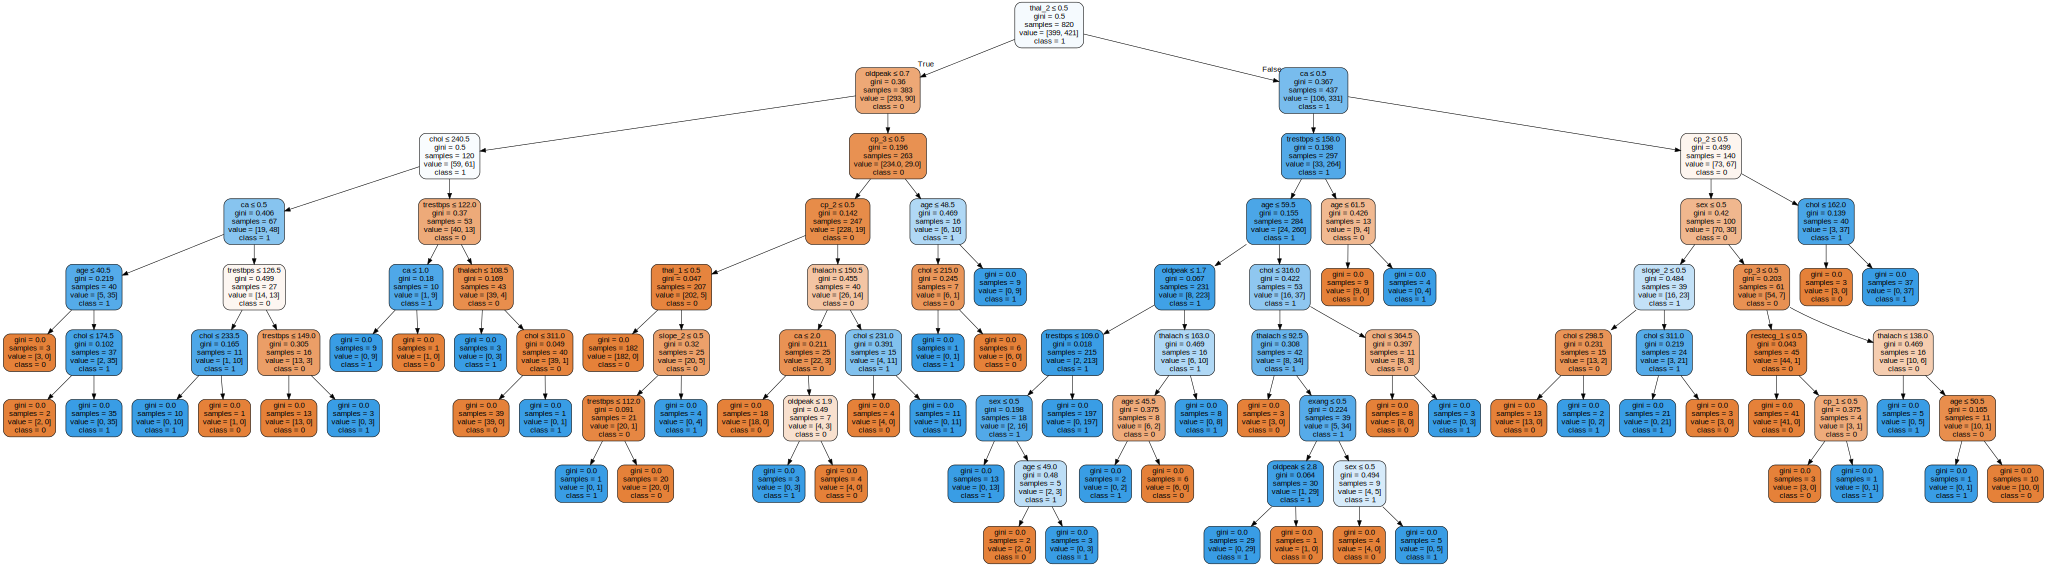

In [14]:
try:
    dt_classifier.predict(X_train.head(1))
except:
    dt_classifier.fit(X_train, y_train)
dot_data = export_graphviz(dt_classifier,
                           out_file=None,
                           feature_names=X_train.columns,
                           class_names=['0', '1'],
                           filled=True,
                           rounded=True,
                           special_characters=True)
graph = graphviz.Source(dot_data)
graph
